In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as mt
import sklearn.metrics as sm
import seaborn as sns
%matplotlib inline


In [5]:
#reading the data
data=pd.read_csv('Iris.csv',index_col=0)
data.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [6]:
data.describe (include="all")


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


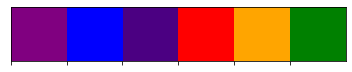

In [8]:
cl=['purple','blue','indigo','red','orange','green']
sns.set_palette(cl)
sns.palplot(sns.color_palette())

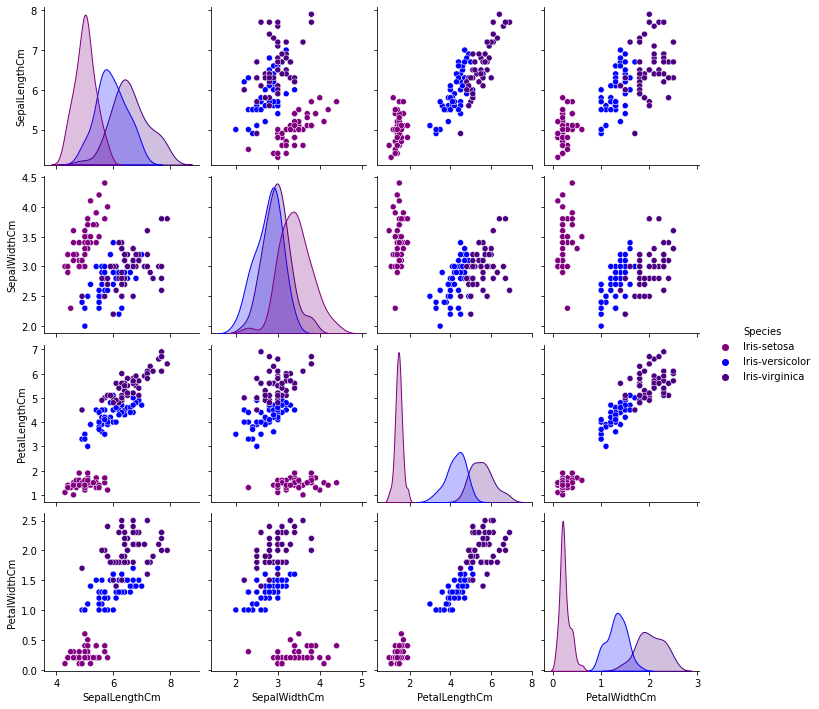

In [9]:
sns.pairplot(data,hue="Species")

In [10]:
#corealtion
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

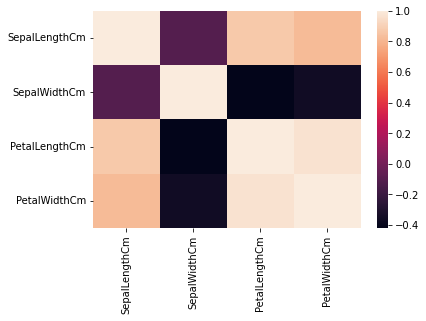

In [12]:
sns.heatmap(data.corr())

In [14]:
#preprocessing of Dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
target=data['Species']
dc=data.copy()
dc=dc.drop('Species', axis=1)
dc.shape

(150, 4)

In [25]:
# Defining the attributes and label

X = data.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
y = data['Species'].values
data.shape

(150, 5)

In [26]:
# Training The Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training split:", X_train.shape)
print("Testing split:",X_test.shape)

Training split: (120, 4)
Testing split: (30, 4)


In [28]:
# decision Tree Algorithm

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('Decision Tree Classifier successfully created')

Decision Tree Classifier successfully created


In [29]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
print("Acccuracy:",sm.accuracy_score(y_test,y_pred))

Acccuracy: 1.0


In [31]:
#confusion Matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

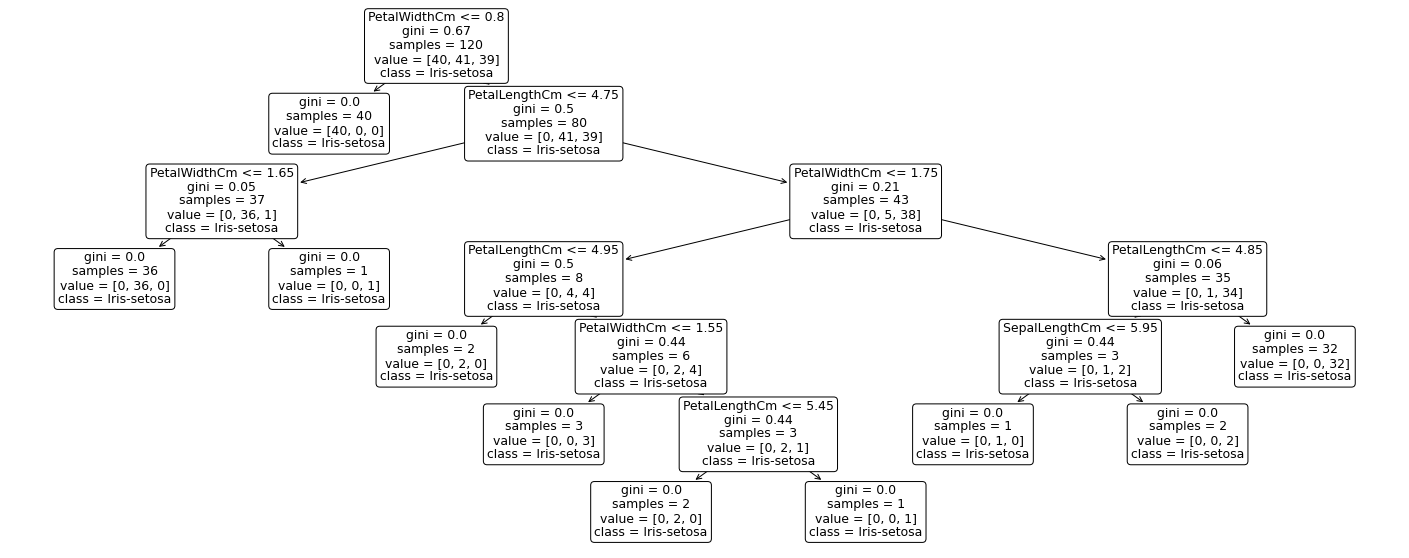

In [33]:
#visualizing the graph

mt.figure(figsize=(25,10))
tree=plot_tree(dtree,feature_names=dc.columns,precision=2,rounded=True,class_names=target.values)